In [1]:
## Import Packages
import numpy as np
import _pickle as pk
import warnings
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
%matplotlib inline

In [84]:
mods = ['CanESM2','CanESM5_p2']

CS = {}
for i in range(len(mods)):
    CS[mods[i]] = pk.load(open('Data/'+mods[i]+'/CFMIP/'+mods[i]+'_CS.pi','rb'))

In [3]:
#define grid and weights
lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

In [4]:
plot = {}
gam = {}
for m in CS.keys():
    plot[m] = {}
    gam[m] = {}
    for x in CS[m].keys():
        plot[m][x] = np.nanmean(CS[m][x],axis=0)
        gam[m][x] = np.average(plot[m][x],weights=coslat)
        plot[m][x] = np.concatenate((plot[m][x][:,64:],plot[m][x][:,0:64]),axis=1)
        plot[m][x],lon_cyc = add_cyclic_point(plot[m][x],lon)

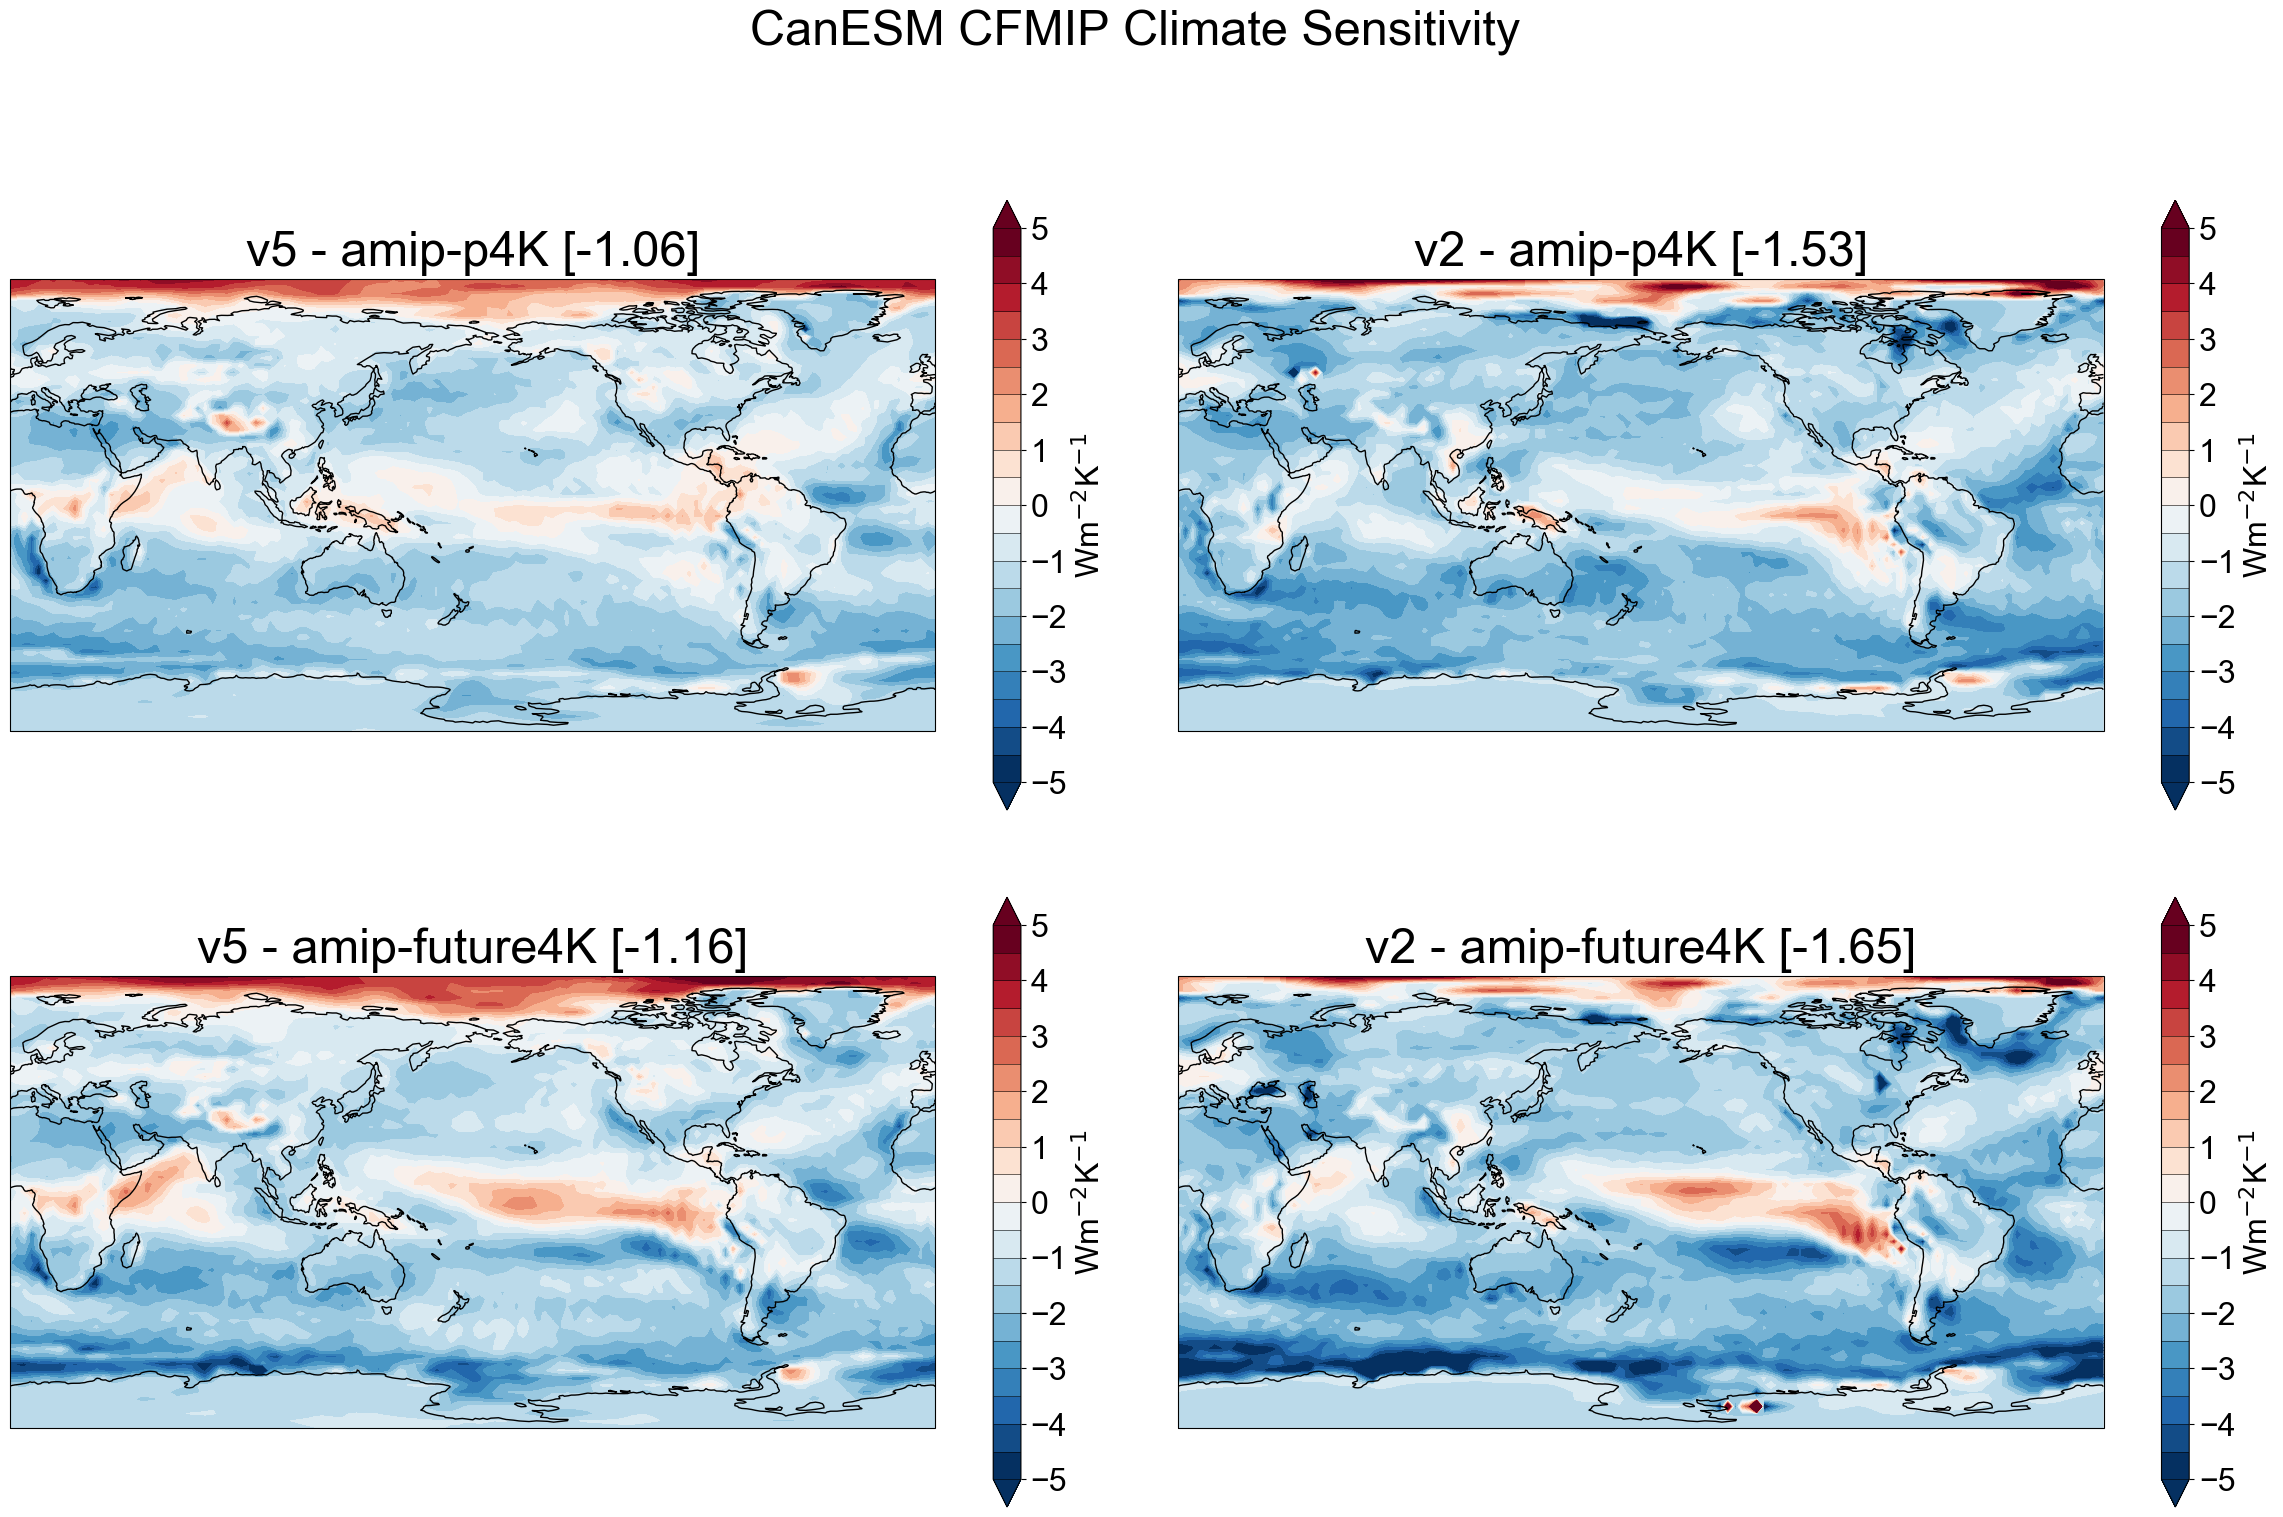

In [9]:
mpl.rc('font',size=23,**{'family':'sans-serif','sans-serif':['Arial']})

cmap = plt.cm.RdBu_r
bounds_diff = np.arange(-5,5.1,0.5)
bounds_diff_ticks = np.arange(-5,5.1,1)
norm_diff = mpl.colors.BoundaryNorm(bounds_diff, cmap.N)

exps = list(dSST.keys())
fig = plt.figure(figsize=(30,30),dpi=100)
plt.suptitle('CanESM CFMIP Climate Sensitivity',fontsize=35,y=0.9)
#gs = gridspec.GridSpec(3,2, width_ratios=[0.6,1],height_ratios=[1,1,1])


ax = plt.subplot(321,projection=ccrs.PlateCarree(central_longitude=180))
ax.set_title('v5 - amip-p4K [{}]'.format(round(gam['CanESM5_p2']['Uniform'],2)),fontsize=35,pad=10)
im = ax.contourf(lon_cyc,lat,plot['CanESM5_p2']['Uniform'],\
                 bounds_diff,cmap=cmap,norm=norm_diff,extend='both')
ax.coastlines()
plt.colorbar(im,ticks=bounds_diff_ticks,drawedges=True,label='Wm$^{-2}$K$^{-1}$',shrink=0.7)

ax1 = plt.subplot(322,projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_title('v2 - amip-p4K [{}]'.format(round(gam['CanESM2']['Uniform'],2)),fontsize=35,pad=10)
im1 = ax1.contourf(lon_cyc,lat,plot['CanESM2']['Uniform'],bounds_diff,cmap=cmap,norm=norm_diff,extend='both')
ax1.coastlines()
plt.colorbar(im1,ticks=bounds_diff_ticks,drawedges=True,label='Wm$^{-2}$K$^{-1}$',shrink=0.7)

ax2 = plt.subplot(323,projection=ccrs.PlateCarree(central_longitude=180))
ax2.set_title('v5 - amip-future4K [{}]'.format(round(gam['CanESM5_p2']['Pattern'],2)),fontsize=35,pad=10)
im2 = ax2.contourf(lon_cyc,lat,plot['CanESM5_p2']['Pattern'],bounds_diff,cmap=cmap,norm=norm_diff,extend='both')
ax2.coastlines()
plt.colorbar(im2,ticks=bounds_diff_ticks,drawedges=True,label='Wm$^{-2}$K$^{-1}$',shrink=0.7)

ax3 = plt.subplot(324,projection=ccrs.PlateCarree(central_longitude=180))
ax3.set_title('v2 - amip-future4K [{}]'.format(round(gam['CanESM2']['Pattern'],2)),fontsize=35,pad=10)
im3 = ax3.contourf(lon_cyc,lat,plot['CanESM2']['Pattern'],bounds_diff,cmap=cmap,norm=norm_diff,extend='both')
ax3.coastlines()
plt.colorbar(im3,ticks=bounds_diff_ticks,drawedges=True,label='Wm$^{-2}$K$^{-1}$',shrink=0.7)

plt.subplots_adjust(wspace=0.01,hspace=-0.2)

#plt.savefig('CanESM5_CFMIP_CS.png',bbox_inches='tight')

In [69]:
v5_p4_slope = -1.06
v5_f4_slope = -1.16

v2_p4_slope = -1.53
v2_f4_slope = -1.65

v2_ERF = 7.34
v5_ERF = 7.6

In [71]:
v5_p4_ECS = (-v5_ERF/v5_p4_slope)/2
v5_f4_ECS = (-v5_ERF/v5_f4_slope)/2

v2_p4_ECS = (-v2_ERF/v2_p4_slope)/2
v2_f4_ECS = (-v2_ERF/v2_f4_slope)/2

In [76]:
print('CanESM5 plus 4k and future 4k')
print('plus 4k -',v5_p4_ECS)
print('future 4k -',v5_f4_ECS)

CanESM5 plus 4k and future 4k
plus 4k - 3.584905660377358
future 4k - 3.2758620689655173


In [77]:
print('CanESM2 plus 4k and future 4k')
print('plus 4k -',v2_p4_ECS)
print('future 4k -',v2_f4_ECS)

CanESM2 plus 4k and future 4k
plus 4k - 2.3986928104575163
future 4k - 2.224242424242424


In [83]:
print('percentage differences?')
print('CanESM2 to 5 from plus 4k - ',((v5_p4_ECS-v2_p4_ECS)/v5_p4_ECS)*100)
print('CanESM2 to 5 from future 4k - ',((v5_f4_ECS-v2_f4_ECS)/v5_f4_ECS)*100)

percentage differences?
CanESM2 to 5 from plus 4k -  33.0890952872377
CanESM2 to 5 from future 4k -  32.10207336523126
